In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#Database Setup
engine = create_engine("sqlite:///hawaii.sqlite")


# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)
base.classes.keys()



['measurement', 'station']

In [3]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station


In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [5]:
prev_year = dt.date(2017, 8, 23)

In [6]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [7]:
results = []

In [8]:
results = session.query(Measurement.date, Measurement.prcp)

In [9]:
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [10]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [11]:
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [12]:
df = pd.DataFrame(results, columns=['date','precipitation'])

In [13]:
df.set_index(df['date'], inplace=True)

In [14]:
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [15]:
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [16]:
df = df.sort_index()

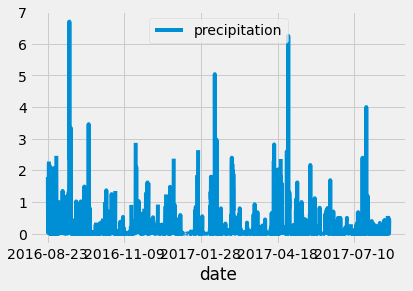

In [17]:
df.plot()

In [18]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
session.query(func.count(Station.station))

In [20]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [22]:
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [23]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

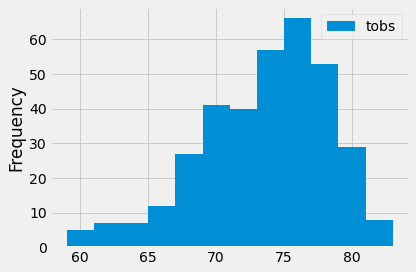

In [24]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [25]:
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (calc_temps('2016-18-02', '2017-18-03'))
print(min_max_avg)


[(58.0, 87.0, 74.14387974230493)]


In [32]:
#Challenge
#Determine key statistical data about the month of June.


In [57]:
# Return the minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2016-06-01', '2016-06-30'))
print(min_max_avg)


[(64.0, 81.0, 75.17525773195877)]


In [58]:
#Query to retrieve the month of precipitation data and plot the results. 
june_1st = dt.date(2016, 6, 1)
june_30th = dt.date(2016, 6, 1) + dt.timedelta(days=30)
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_30th).all()
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()

df

,date,precipitation
0,2016-06-01,0.06
1,2016-06-02,0.00
2,2016-06-03,0.00
3,2016-06-04,0.00
4,2016-06-05,0.00
...,...,...
195,2016-06-26,0.70
196,2016-06-27,0.30
197,2016-06-28,0.25
198,2016-06-29,0.35


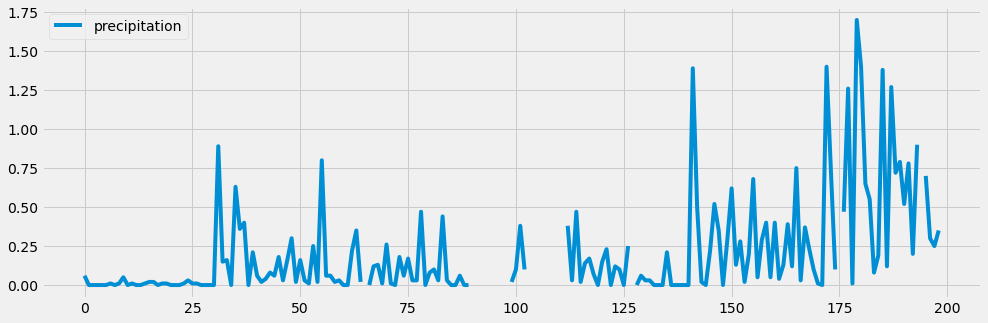

In [59]:

df.plot(figsize=(15,5))

In [60]:
df.describe()


,precipitation
count,177.000000
mean,0.207514
std,0.324999
min,0.000000
25%,0.010000
50%,0.060000
75%,0.260000
max,1.700000


In [61]:
#minimum, average, and maximum temperatures of the range of dates
def june_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2017-06-01', '2017-06-30'))
print(min_max_avg)


[(71.0, 83.0, 77.21989528795811)]


In [62]:
#Query to retrieve the month of precipitation data and plot the results. 
june_1st = dt.date(2017, 6, 1)
june_30th = dt.date(2017, 6, 1) + dt.timedelta(days=30)
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_1st).filter(Measurement.date <= june_30th).all()
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
# Sort the dataframe by date
df = df.sort_index()

df

,date,precipitation
0,2017-06-01,0.00
1,2017-06-02,0.00
2,2017-06-03,0.02
3,2017-06-04,0.00
4,2017-06-05,0.00
...,...,...
190,2017-06-27,0.10
191,2017-06-28,0.02
192,2017-06-29,0.04
193,2017-06-30,0.20


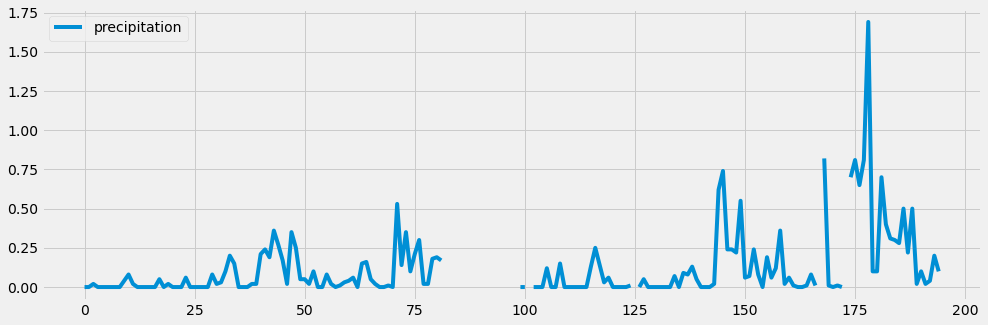

In [63]:
df.plot(figsize=(15,5))


In [64]:

df.describe()

,precipitation
count,175.000000
mean,0.118743
std,0.215414
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


In [67]:
##DECEMBER KEY STATISTICAL DATA

In [154]:
#minimum, average, and maximum temperatures of the range of dates
def dec_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (june_calc_temps('2016-12-01', '2016-12-31'))
print(min_max_avg)

[(60.0, 78.0, 71.13)]


In [69]:

Dec_1st = dt.date(2016, 12, 1)
Dec_31st = dt.date(2016, 12, 1) + dt.timedelta(days=31)
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Dec_1st).filter(Measurement.date <= Dec_31st).all()
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
df = df.sort_index()

df

,date,precipitation
0,2016-12-01,0.12
1,2016-12-02,0.03
2,2016-12-03,0.00
3,2016-12-04,0.03
4,2016-12-05,0.43
...,...,...
201,2016-12-28,0.14
202,2016-12-29,1.03
203,2016-12-30,2.37
204,2016-12-31,0.90


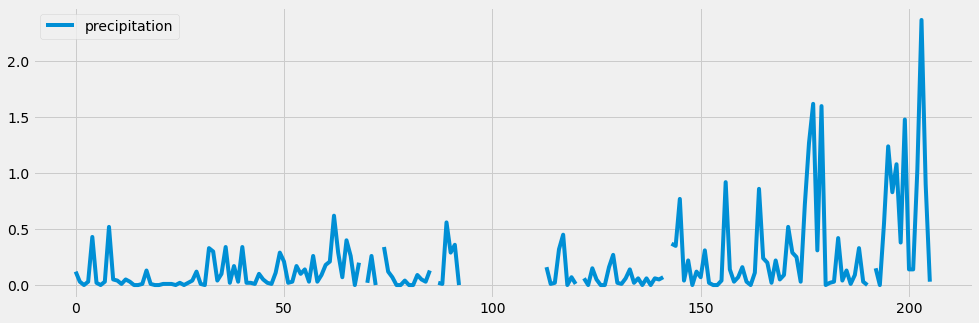

In [70]:

df.plot(figsize=(15,5))


In [71]:
df.describe()

,precipitation
count,183.000000
mean,0.195956
std,0.339382
min,0.000000
25%,0.020000
50%,0.060000
75%,0.245000
max,2.370000


In [72]:
def dec_calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (dec_calc_temps('2017-12-01', '2017-12-31'))
print(min_max_avg)

[(None, None, None)]


In [73]:
Dec_1st = dt.date(2017, 12, 1)
Dec_31st = dt.date(2017, 12, 1) + dt.timedelta(days=30)
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Dec_1st).filter(Measurement.date <= Dec_31st).all()
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=False)
df = df.sort_index()

df

,date,precipitation


In [74]:
df.plot(figsize=(15,5))

TypeError: no numeric data to plot

In [75]:

df.describe()

,date,precipitation
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


In [125]:
import datetime
import calendar
from datetime import timedelta
year = 2016
month = 6
num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)
june_16_results = []
june_16_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()


print(june_16_results)

[('2016-06-01', 0.06), ('2016-06-02', 0.0), ('2016-06-03', 0.0), ('2016-06-04', 0.0), ('2016-06-05', 0.0), ('2016-06-06', 0.0), ('2016-06-07', 0.01), ('2016-06-08', 0.0), ('2016-06-09', 0.01), ('2016-06-10', 0.05), ('2016-06-11', 0.0), ('2016-06-12', 0.01), ('2016-06-13', 0.0), ('2016-06-14', 0.0), ('2016-06-15', 0.01), ('2016-06-16', 0.02), ('2016-06-17', 0.02), ('2016-06-18', 0.0), ('2016-06-19', 0.01), ('2016-06-20', 0.01), ('2016-06-21', 0.0), ('2016-06-22', 0.0), ('2016-06-23', 0.0), ('2016-06-24', 0.01), ('2016-06-25', 0.03), ('2016-06-26', 0.01), ('2016-06-27', 0.01), ('2016-06-28', 0.0), ('2016-06-29', 0.0), ('2016-06-30', 0.0), ('2016-06-01', 0.89), ('2016-06-02', 0.15), ('2016-06-03', 0.16), ('2016-06-04', 0.0), ('2016-06-05', 0.63), ('2016-06-06', 0.36), ('2016-06-07', 0.4), ('2016-06-08', 0.0), ('2016-06-09', 0.21), ('2016-06-10', 0.06), ('2016-06-11', 0.02), ('2016-06-12', 0.04), ('2016-06-13', 0.08), ('2016-06-14', 0.06), ('2016-06-15', 0.18), ('2016-06-16', 0.03), ('2016

In [126]:
june_16_df = pd.DataFrame(june_16_results, columns=['date','precipitation'])

In [127]:
june_16_df.set_index(june_16_df['date'], inplace = True)

In [128]:
june_16_df=june_16_df.sort_index()

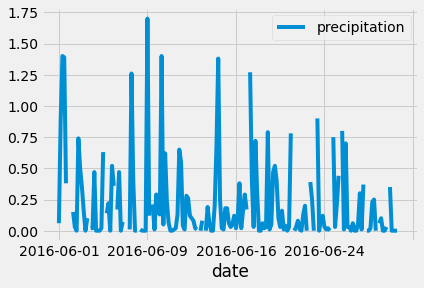

In [129]:
june_16_df.plot()

In [130]:
june_16_df.describe()

,precipitation
count,173.000000
mean,0.212312
std,0.327195
min,0.000000
25%,0.010000
50%,0.060000
75%,0.280000
max,1.700000


In [131]:
import datetime
import calendar
from datetime import timedelta
year = 2017
month = 6
num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)
june_17_results = []
june_17_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()


print(june_17_results)

[('2017-06-01', 0.0), ('2017-06-02', 0.0), ('2017-06-03', 0.02), ('2017-06-04', 0.0), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.0), ('2017-06-09', 0.0), ('2017-06-10', 0.04), ('2017-06-11', 0.08), ('2017-06-12', 0.02), ('2017-06-13', 0.0), ('2017-06-14', 0.0), ('2017-06-15', 0.0), ('2017-06-16', 0.0), ('2017-06-17', 0.0), ('2017-06-18', 0.05), ('2017-06-19', 0.0), ('2017-06-20', 0.02), ('2017-06-21', 0.0), ('2017-06-22', 0.0), ('2017-06-23', 0.0), ('2017-06-24', 0.06), ('2017-06-25', 0.0), ('2017-06-26', 0.0), ('2017-06-27', 0.0), ('2017-06-28', 0.0), ('2017-06-29', 0.0), ('2017-06-30', 0.08), ('2017-06-01', 0.03), ('2017-06-02', 0.1), ('2017-06-03', 0.2), ('2017-06-04', 0.15), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.02), ('2017-06-09', 0.02), ('2017-06-10', 0.21), ('2017-06-11', 0.24), ('2017-06-12', 0.19), ('2017-06-13', 0.36), ('2017-06-14', 0.27), ('2017-06-15', 0.17), ('2017-06-16', 0.02), ('2017-06-17',

In [132]:
june_17_df = pd.DataFrame(june_17_results, columns=['date','precipitation'])

In [133]:
june_17_df.set_index(june_17_df['date'], inplace = True)

In [134]:
june_17_df=june_17_df.sort_index()

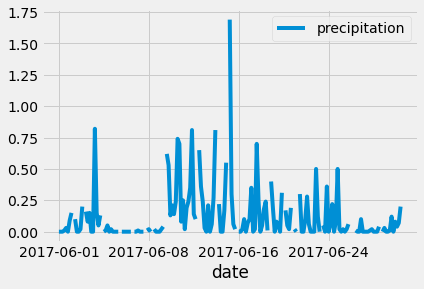

In [135]:
june_17_df.plot()

In [136]:
june_17_df.describe()

,precipitation
count,171.000000
mean,0.120000
std,0.217726
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


In [137]:
import datetime
import calendar
from datetime import timedelta
year = 2016
month = 12
num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)
dec_16_results = []
dec_16_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()


print(dec_16_results)

[('2016-12-01', 0.12), ('2016-12-02', 0.03), ('2016-12-03', 0.0), ('2016-12-04', 0.03), ('2016-12-05', 0.43), ('2016-12-06', 0.02), ('2016-12-07', 0.0), ('2016-12-08', 0.03), ('2016-12-09', 0.52), ('2016-12-10', 0.05), ('2016-12-11', 0.04), ('2016-12-12', 0.01), ('2016-12-13', 0.05), ('2016-12-14', 0.03), ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.01), ('2016-12-18', 0.13), ('2016-12-19', 0.01), ('2016-12-20', 0.0), ('2016-12-21', 0.0), ('2016-12-22', 0.01), ('2016-12-23', 0.01), ('2016-12-24', 0.01), ('2016-12-25', 0.0), ('2016-12-26', 0.02), ('2016-12-27', 0.0), ('2016-12-28', 0.02), ('2016-12-29', 0.04), ('2016-12-30', 0.12), ('2016-12-31', 0.01), ('2016-12-01', 0.33), ('2016-12-02', 0.3), ('2016-12-03', 0.04), ('2016-12-04', 0.1), ('2016-12-05', 0.34), ('2016-12-06', 0.02), ('2016-12-07', 0.17), ('2016-12-08', 0.03), ('2016-12-09', 0.34), ('2016-12-10', 0.02), ('2016-12-11', 0.02), ('2016-12-12', 0.01), ('2016-12-13', 0.1), ('2016-12-14', 0.05), ('2016-12-15', 0.02)

In [138]:
dec_16_df = pd.DataFrame(dec_16_results, columns=['date','precipitation'])

In [139]:
dec_16_df.set_index(dec_16_df['date'], inplace = True)

In [140]:
dec_16_df=dec_16_df.sort_index()

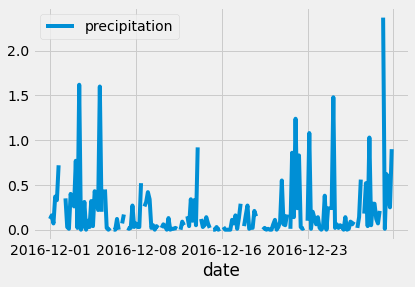

In [141]:
dec_16_df.plot()

In [142]:
dec_16_df.describe()

,precipitation
count,178.000000
mean,0.199494
std,0.342967
min,0.000000
25%,0.020000
50%,0.060000
75%,0.247500
max,2.370000


In [143]:
import datetime
import calendar
from datetime import timedelta
year = 2017
month = 12
num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)
dec_17_results = []
dec_17_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()


print(dec_17_results)

[]


In [ ]:
print(dec_17_results)

In [150]:
dec_17_df.set_index(dec_17_df['date'], inplace = True)

In [151]:
dec_17_df.set_index(dec_17_df['date'], inplace = True)

In [152]:
dec_17_df=dec_17_df.sort_index()

In [153]:
dec_17_df.plot()

TypeError: no numeric data to plot

In [148]:
dec_17_df.describe()

,date,precipitation
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN
